# Esperimento Sulla Legge Di Hooke

## Importo le librerie

In [1]:
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from pprint import pprint
from google.colab import files


## Fit Lineare

### Carico I Dati

In [2]:
PATH_DATI_PARZIALI = list(files.upload().keys())[0]

Saving peso-spostamento.txt to peso-spostamento.txt


### Importo I Dati

La lettura del file dati viene effettuata assumendo che siano formattati in un file di testo, con tabulazioni come separatore, con le colonne corrispondenti a 

 $$\text{Peso}\quad|\quad \text{Elongazione} \quad|\quad\sigma(\text{Peso})\quad|\quad\sigma(\text{Elongazione})$$

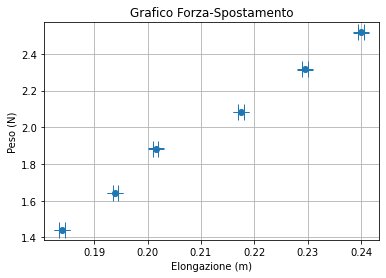

In [3]:
DEBUG = False

dati_parziali = {"peso":[], "elongazioni": [], "err_peso": [], "err_elongazioni": []}

with open(PATH_DATI_PARZIALI, "r") as f:
    for row in f.readlines()[1:]:
        roles = list(dati_parziali.keys())
        k = 0
        for value in row.split("\t"):
            dati_parziali[roles[k]].append(float(value))
            k += 1
            
if DEBUG:
    pprint(dati_parziali)
    
peso = np.array(dati_parziali["peso"])
elongazione = np.array(dati_parziali["elongazioni"])
err_peso = np.array(dati_parziali["err_peso"])
err_elongazione = np.array(dati_parziali["err_elongazioni"])

plt.figure()
plt.title("Grafico Forza-Spostamento")
plt.grid()
plt.xlabel("Elongazione (m)")
plt.ylabel("Peso (N)")
_ = plt.errorbar(elongazione, peso,yerr=err_peso, xerr=err_elongazione, capsize=8, fmt='o')

### Eseguo il fit

In [4]:
def retta(x,A,B): 
  return A*x+B

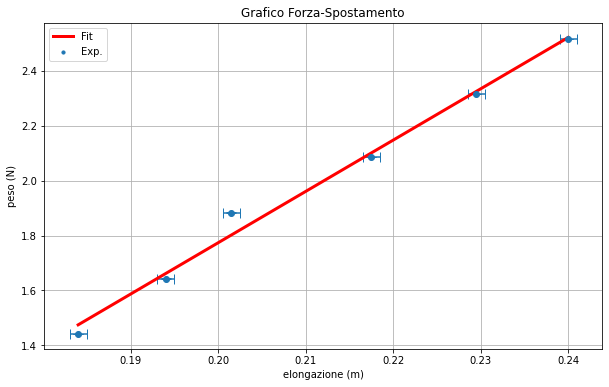

         k = 18.682109 +- 0.952688
        P0 = -1.962677 +- 0.201972




In [5]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.

def fitplot(x, y, xerr, yerr, print_output=True): 
  
  plt.figure(figsize=(10, 6))
  popt, pcov = curve_fit(retta, x, y)
                                                                          
  #plotting fit result
  plt.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='None', capsize=5, marker='o')
  plt.scatter(x,y,s=10,label="Exp.")
  plt.plot(x,retta(x,popt[0],popt[1]),color=[1,0,0],label="Fit",linewidth=3)
  plt.xlabel("elongazione (m)")
  plt.ylabel("peso (N)")
  plt.grid(which='both')
  plt.title("Grafico Forza-Spostamento")
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["k", "P0"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%10s = %9.6f +- %7.6f" % (l ,v, e))
    print("\n")  

fitplot(elongazione, peso, err_peso, err_elongazione)

## Fit Sinusoidale

### Carico I Dati

In [6]:
PATH_DATI_COMPLETI = list(files.upload().keys())[0]

Saving tempo-spostamento.txt to tempo-spostamento.txt


### Importo I Dati

La lettura del file dati viene effettuata assumendo che siano formattati in un file di testo, con punti e virgole (;) come separatore e virgole (,) come delimitatori decimali. Le colonne corrispondenti a 

 $$\text{Tempo-1}\quad|\quad \text{Elongazione-1} \quad|\quad\text{Tempo-2}\quad|\quad\text{Elongazione-2}\quad|\quad\text{Tempo-N}\quad|\quad \text{Elongazione-N}$$

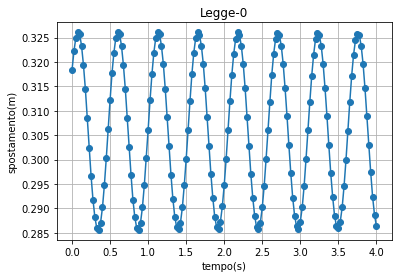

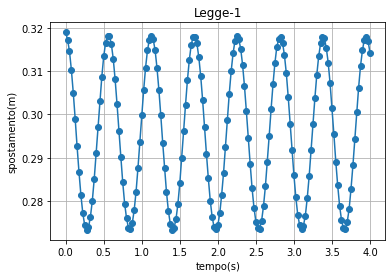

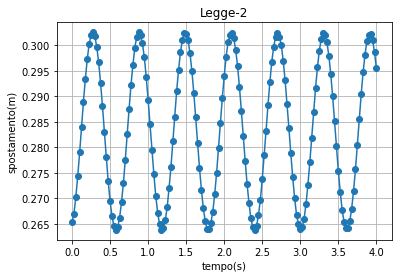

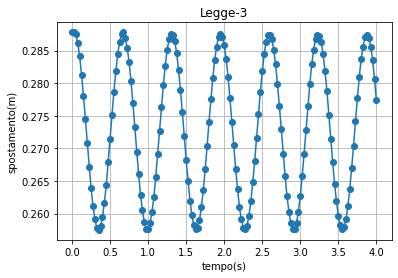

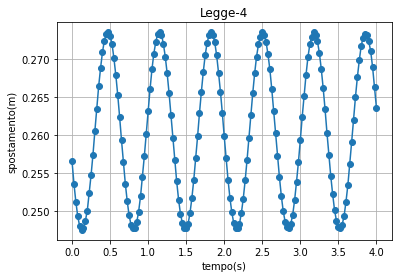

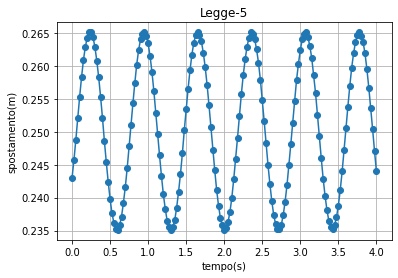

In [7]:
AMOUNT = 6
LIMIT = 200
DEBUG = False

# creo il dizionario che conterrà i dati
dati_completi = {}

with open(PATH_DATI_COMPLETI, "r") as f:
  for index in range(int(len(f.readline().split(";")) / 2)):
    dati_completi[f"tempo-{index}"] = []
    dati_completi[f"elongazione-{index}"] = []
  for line in f.readlines()[:LIMIT]:
    for index in range(int(len(line.split(";")) / 2)):
      dati_completi[f"tempo-{index}"].append(float(line.split(";")[2 * index].replace(",", ".")))
      dati_completi[f"elongazione-{index}"].append(float(line.split(";")[2 * index + 1].replace(",", ".")))
  for index in range(int(len(dati_completi) / 2)):
    dati_completi[f"tempo-{index}"] = np.array(dati_completi[f"tempo-{index}"])
    dati_completi[f"elongazione-{index}"] = np.array(dati_completi[f"elongazione-{index}"])

if DEBUG:
  pprint(dati_completi)


for index in range(int(len(dati_completi) / 2))[:AMOUNT]:
    t = dati_completi[f"tempo-{index}"]
    y = dati_completi[f"elongazione-{index}"]
    plt.figure()    #visualizzo i dati importati
    plt.title(f"Legge-{index}")
    plt.xlabel("tempo(s)")
    plt.ylabel("spostamento(m)")
    plt.grid()
    _ = plt.plot(t,y, marker='o')

### Eseguo Il Fit Per Un Solo Set Di Dati

In [11]:
#Definizione della funzione di fit 
def damped_sine(t,A,omega,phi,gamma,y0): 
  return A*np.exp(-gamma*t)*np.sin(omega*t+phi)+y0

In [9]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.
 
def fitplot_sin(A, omega, y0, phi, gamma, print_output=True, plot_guess=False):
 
  guess = np.array([A,omega,phi,gamma,y0]) #array delle stime iniziali
  bounds = ([0,0,-np.pi,0,0], [10., 25, np.pi,1,10]) 
 
  global popt, pcov    #i risultati del fit sono variabili globali 
 
  plt.figure()
  popt, pcov = curve_fit(damped_sine, t, y, p0=guess, bounds=bounds)

# calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = y- damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot) 

  if plot_guess:
    plt.plot(t, damped_sine(t, guess[0], guess[1], guess[2],guess[3],guess[4]),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess

                                                                                          
  #plot dei risultati
  
  plt.scatter(t,y,s=20,label="Exp.")     
  plt.plot(t,damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4]),color=[1,0,0],label="Fit ($R^2=${:.4f})".format(r_squared),linewidth=2)
  plt.xlabel("tempo (s)")
  plt.ylabel("spostamento (m)")
  plt.title("Grafico Spostamento-Tempo")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  
  if print_output:
    label = ["A", "omega", "phi","gamma"]
    unit = ["m", "rad/s", "rad", ""]
    for l, v, e, u in zip(label, popt, np.sqrt(np.diag(pcov)), unit) :
      print("%10s = %9.6f +- %7.6f %s" % (l ,v, e, u))
    print("R-squared = "+str(r_squared))

In [10]:
 interact_manual.opts["manual_name"]= 'Fit'
_=interact_manual(fitplot_sin, A=BoundedFloatText(min=0.001, max=5, step=1e-2,description='A'),
                  omega=BoundedFloatText(min=0.1, max=20, step=1e-2, description='omega'),
                  gamma=BoundedFloatText(min=0, max=0.5, step=1e-2, value=0),
                  y0=BoundedFloatText(min=0.001, max=10, step=1e-2),
                  phi=FloatSlider(min=-np.pi, max=np.pi, step=1e-1, value=0),
                  print_output=Checkbox(value=True, description='Visualizza parametri fit'),
                  plot_guess=Checkbox(value=True ,description='Visualizza funzione di prova'))

interactive(children=(BoundedFloatText(value=0.001, description='A', max=5.0, min=0.001, step=0.01), BoundedFl…

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Eseguo Il Fit Per Tutti I Set Di Dati

In [12]:
#Definizione della funzione di fit 
def damped_sine(t,A,omega,phi,gamma,y0): 
  return A*np.exp(-gamma*t)*np.sin(omega*t+phi)+y0

In [14]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.
 
def fitplot_sin(t, y, A, omega, y0, phi, gamma, plot_guess=False, debug=False):
 
  guess = np.array([A,omega,phi,gamma,y0]) #array delle stime iniziali
  bounds = ([0,0,-np.pi,0,0], [10., 25, np.pi,1,10]) 
 
  popt, pcov = curve_fit(damped_sine, t, y, p0=guess, bounds=bounds)

  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = y- damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot) 

  label = ["A", "omega", "phi","gamma"]
  data = {}
  for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
    data[l] = v
    data[l + "_err"] = e

  if plot_guess:
    plt.plot(t, damped_sine(t, guess[0], guess[1], guess[2],guess[3],guess[4]),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess
                                                                     
  #plot dei risultati
  if debug:
    plt.figure()
    plt.scatter(t,y,s=20,label="Exp.")     
    plt.plot(t,damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4]),color=[1,0,0],label="Fit ($R^2=${:.4f})".format(r_squared),linewidth=2)
    plt.xlabel("tempo (s)")
    plt.ylabel("distanza (m)")
    plt.grid(which='both')
    plt.legend()
    plt.show()

  return data

#### Ricavo Tutte Le Informazioni Dai Fit

In [15]:
# creo il dizionario contenente le informazioni prese dal fit dei dati

dati_fit = {}
DEBUG = False

masse =       [0.147, 0.1675, 0.192, 0.2125, 0.236, 0.2565]   # masse usate nelle misurazioni
masse_err =   0.0001                                          # errore della bilancia
k =           19.39                                           # coefficente elastico ricavato sperimentalmente dal fit lineare
k_err =       0.102

for index in range(int(len(dati_completi) / 2)):
  current = fitplot_sin(dati_completi[f"tempo-{index}"], dati_completi[f"elongazione-{index}"], 0.15, 9.41, 0, 0, 0, debug=False)
  current["T0"] = (2 * np.pi) / current["omega"] # periodo
  current["T0_err"] = (current["omega_err"] / current["omega"]) * current["T0"] # errore sul periodo
  current["M"] = masse[index] # massa zavorra
  current["M_err"] = masse_err # errore sulla massa
  current["me"] = k / (current["omega"] ** 2) - current["M"]
  current["me_err"] = (k_err / k + 2 * (current["omega_err"] / current["omega"])) * (k / (current["omega"] ** 2)) + masse_err
  dati_fit[f"fit-{index}"] = current

if DEBUG:
   pprint(dati_fit)


### Faccio Una Stima Del Coefficiente Elastico k

In [16]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

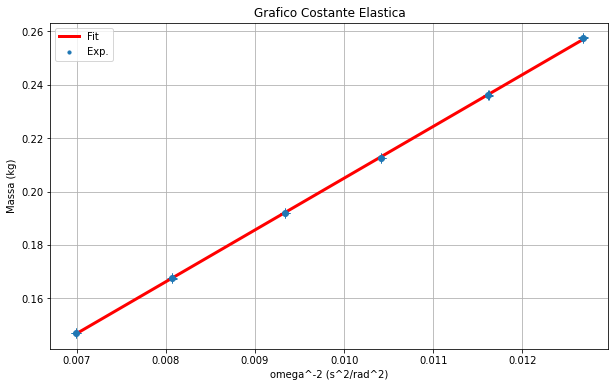

         k = 19.391665 +- 0.102058 N/m
        me =  0.011090 +- 0.001025 kg




In [17]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.

y = [0.147, 0.1675, 0.192, 0.2125, 0.236, 0.2576]
x = [dati_fit[f"fit-{index}"]["omega"] ** (-2) for index in range(len(dati_fit))]
y = np.array(y)
x = np.array(x)
yerr = [0.0001] * 6
xerr = [ 2 * (dati_fit[f"fit-{index}"]["omega_err"] / (dati_fit[f"fit-{index}"]["omega"] ** 3))  for index in range(len(dati_fit))]




def fitplot(A, B, print_output=True, plot_guess=False):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(10, 6))
 
  popt, pcov = curve_fit(retta, x, y, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess

                                                                                                
  #plotting fit result
  plt.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='None', capsize=5, marker='o')
  plt.scatter(x,y,s=10,label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color=[1,0,0],label="Fit",linewidth=3)
  plt.xlabel("omega^-2 (s^2/rad^2)")
  plt.ylabel("Massa (kg)")
  plt.grid(which='both')
  plt.title("Grafico Costante Elastica")
  plt.legend()
  plt.show()
  
  
  if print_output:
    label = ["k", "me"]
    unit = ["N/m", "kg"]
    for l, v, e, u in zip(label, popt, np.sqrt(np.diag(pcov)), unit) :
      print("%10s = %9.6f +- %7.6f %s" % (l ,v, e, u))
    print("\n")  

fitplot(0, 0)

### Faccio Una Stima Della Gravità

In [18]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

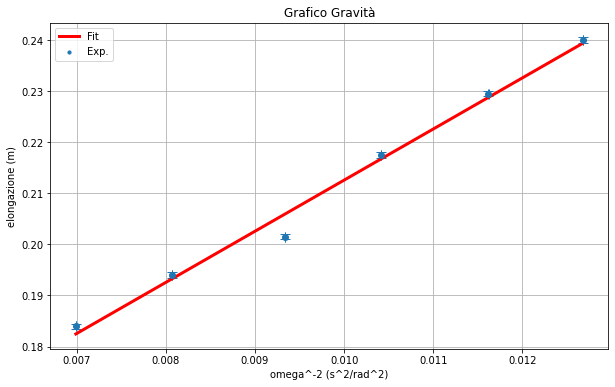

         g = 10.007392 +- 0.512010 m/s^2
    me*g/k =  0.112509 +- 0.005142 m




In [19]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.

y = [0.184, 0.194, 0.2015, 0.2175, 0.2295, 0.24]
x = [dati_fit[f"fit-{index}"]["omega"] ** (-2) for index in range(len(dati_fit))]
y = np.array(y)
x = np.array(x)
yerr = [0.0005] * 6
xerr = [ 2 * (dati_fit[f"fit-{index}"]["omega_err"] / (dati_fit[f"fit-{index}"]["omega"] ** 3))  for index in range(len(dati_fit))]




def fitplot(A, B, print_output=True, plot_guess=False):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(10, 6))
 
  popt, pcov = curve_fit(retta, x, y, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess

                                                                                                
  #plotting fit result
  plt.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='None', capsize=5, marker='o')
  plt.scatter(x,y,s=10,label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color=[1,0,0],label="Fit",linewidth=3)
  plt.xlabel("omega^-2 (s^2/rad^2)")
  plt.ylabel("elongazione (m)")
  plt.grid(which='both')
  plt.title("Grafico Gravità")
  plt.legend()
  plt.show()
  
  
  if print_output:
    label = ["g", "me*g/k"]
    unit = ["m/s^2", "m"]
    for l, v, e, u in zip(label, popt, np.sqrt(np.diag(pcov)), unit) :
      print("%10s = %9.6f +- %7.6f %s" % (l ,v, e, u))
    print("\n")  

fitplot(0, 0)